In [1]:
from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By 
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
import time
from bs4 import BeautifulSoup
import pandas as pd

In [2]:

url='https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS'
driver = webdriver.Chrome()

driver.get(url)
time.sleep(10)
driver.find_element(By.ID, "onetrust-accept-btn-handler").click()
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [3]:
reviews_url=[]
parts = url.split("-Reviews",1)
first_part = parts[0] + '-Reviews'
second_part = parts[1]
for i in range(1, 10):
    reviews_url.append(first_part + '-or' +str(i)+'0' + second_part)
    print(reviews_url[i-1])


https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or10-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or20-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or30-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or40-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or50-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or60-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or70-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS

In [22]:

reviewDetails=[]

reviews = soup.find_all('div', class_='azLzJ MI Gi z Z BB kYVoW')

# reviews = soup.find_all('div', class_='YibKl MC Gi z Z BB pBbQr lqYst')
for review in reviews:
    # print(review.text)
    print('-------------------')
    reviews_text = review.find('span', {'class':'orRIx Ci _a C'}).text
    reviews_rating = review.find('svg', {'class':'UctUV d H0'}).text

    components = reviews_rating.split()

    # Initialize a variable to store the float
    rating = None

    # Loop through the components to find the first float
    for component in components:
        if '.' in component:
            try:
                # Attempt to convert the component to a float
                rating = float(component)
                break  # Exit the loop once the first float is found
            except ValueError:
                # If conversion fails, skip this component
                continue

    # print(type(rating))
    # review_rating = review.find('title', id=':lithium-rb:')
    reviewDetails.append((rating,reviews_text))
        # print(review_rating+ review.text)
    # print(rating, reviews_text)
    # print('-------------------')
    

# for item in reviewDetails:
#     print(item)
#     print('-------------------')

-------------------
5.0 Thank you to all the staff at Chongfah for creating such a memorable 50th bday for my husband Mr Peter in July. We were a party of 10 adults & two children. The staff ensured we had everything we needed and even put on a special 50th bday breakfast. The room were exceptionally clean & cleaned to a high standard daily. We looked forward to seeing the towel art each day.Beds, very comfy with a choice of pillows from the pillow menu.Lots of variety for breakfast with a buffet & ordering from a menu, great coffee best I e had in Thailand all while looking out over the ocean. Happy hour each night by the pool with a good choice of cocktails.The staff are Chongfah's biggest asset.Thank you
-------------------
-------------------
5.0 Checking in was really a breeze, a warm welcome from Sukanya and the ladies was genuinely friendly and made us feel right at home.The infinity Pool is great for a dip and laps in the early morning or late afternoon.Our air conditioned room

In [27]:
# %store


for urls in reviews_url:
    print(urls)
    driver.get(urls)
    time.sleep(6)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    reviews = soup.find_all('div', class_='azLzJ MI Gi z Z BB kYVoW')
    
    # reviews = soup.find_all('div', class_='YibKl MC Gi z Z BB pBbQr lqYst')
    for review in reviews:
        # print(review.text)
        # 

        # reviews_text = review.find('div', {'class':'_T FKffI bmUTE'}).text
        reviews_text = review.find('span', {'class':'orRIx Ci _a C'}).text
        reviews_rating = review.find('svg', {'class':'UctUV d H0'}).text

        components = reviews_rating.split()

        # Initialize a variable to store the float
        rating = None

        # Loop through the components to find the first float
        for component in components:
            if '.' in component:
                try:
                    # Attempt to convert the component to a float
                    rating = float(component)
                    break  # Exit the loop once the first float is found
                except ValueError:
                    # If conversion fails, skip this component
                    continue

        # print(type(rating))
        # review_rating = review.find('title', id=':lithium-rb:')
        reviewDetails.append((rating,reviews_text))
        # print(rating+ review.text)
        # print(rating)
        # print('-------------------')
print(len(reviewDetails))



# for item in reviewDetails:
#     print(item)
#     print('-------------------')

https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or10-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or20-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or30-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or40-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or50-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or60-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS
https://www.tripadvisor.com/Hotel_Review-g297914-d1167079-Reviews-or70-Chongfah_Beach_Resort-Khao_Lak_Takua_Pa_Phang_Nga_Province.html#REVIEWS

In [28]:
print(len(reviewDetails))

171


In [29]:
reviews_df = pd.DataFrame(reviewDetails, columns=['Rating', 'Review'])
reviews_df.to_csv('reviews.csv', index=False)
print("The CSV file is created successfully")

The CSV file is created successfully


In [30]:
hotels_csv_file = pd.read_csv("reviews.csv")
hotels_csv_file.head()

,Rating,Review
0,5.0,Thank you to all the staff at Chongfah for cre...
1,5.0,"Checking in was really a breeze, a warm welcom..."
2,5.0,This place is so good. From the moment we chec...
3,5.0,Can't say enough positive things the resort is...
4,5.0,This hotel is situated on the sea front althou...


In [31]:
# look  describe data set
hotels_csv_file["Rating"].describe().round(2)

count    171.00
mean       4.85
std        0.49
min        2.00
25%        5.00
50%        5.00
75%        5.00
max        5.00
Name: Rating, dtype: float64

In [32]:
# calculate percentage rating
percentage_rating = (hotels_csv_file['Rating'].value_counts(normalize=True) * 100).round(2)

# print percentage rating
print('The percentage rating')
print(percentage_rating)


The percentage rating
Rating
5.0    89.47
4.0     8.19
2.0     1.75
3.0     0.58
Name: proportion, dtype: float64


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplotsns.countplot(x=df['Rating'])
plt.show()

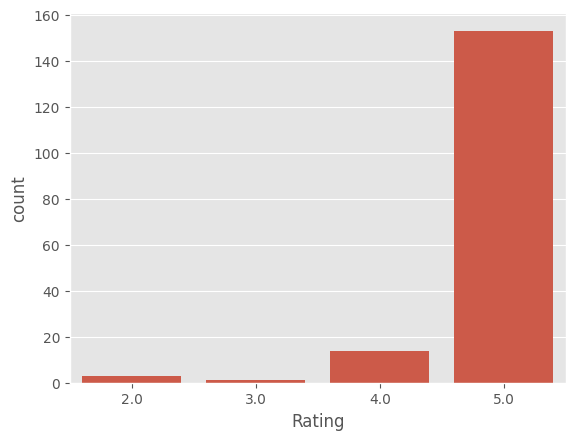

In [37]:
sns.countplot(x=hotels_csv_file['Rating'])
plt.show()

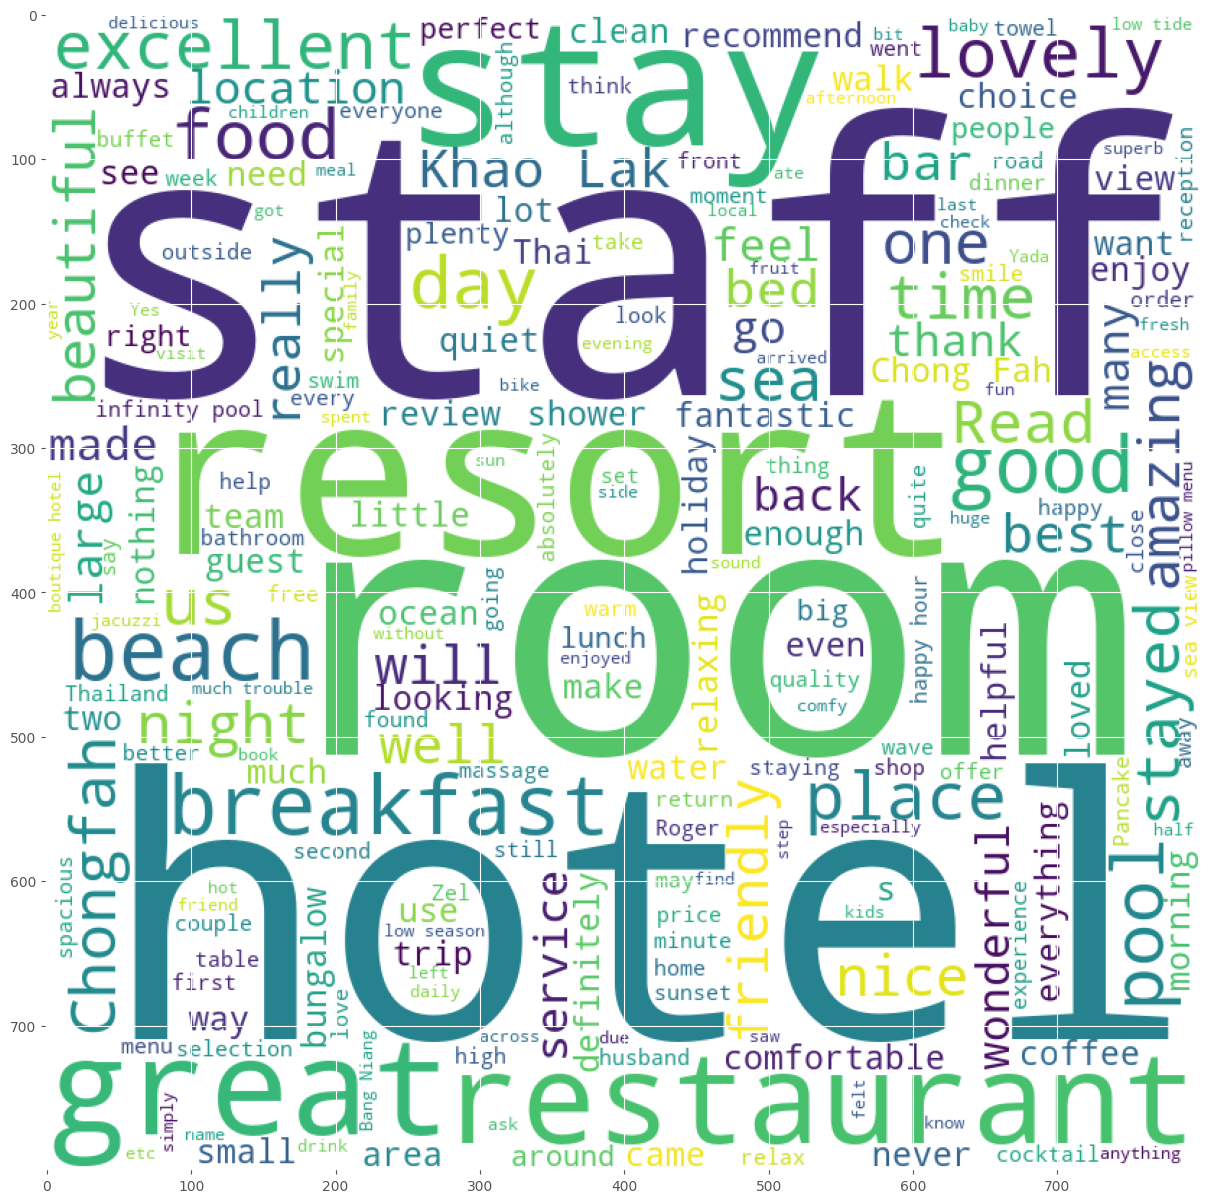

In [41]:
from wordcloud import WordCloud, STOPWORDS
# the highest work repeat in the review rating 5
plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, height=800,width=800,background_color="white").generate(' '.join(hotels_csv_file['Review']))

plt.imshow(wc1)

In [44]:
# Length of word in sentence
hotels_csv_file['Length'] = hotels_csv_file['Review'].apply(len)
hotels_csv_file.head()

,Rating,Review,Length
0,5.0,Thank you to all the staff at Chongfah for cre...,692
1,5.0,"Checking in was really a breeze, a warm welcom...",1066
2,5.0,This place is so good. From the moment we chec...,1100
3,5.0,Can't say enough positive things the resort is...,434
4,5.0,This hotel is situated on the sea front althou...,605


/var/folders/57/x9gmx2_n2f782wfm6l_n4fcw0000gn/T/ipykernel_61044/1670676006.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=hotels_csv_file, x='Length', hue='Rating', palette='flare', kind='kde', fill=True, aspect=4)


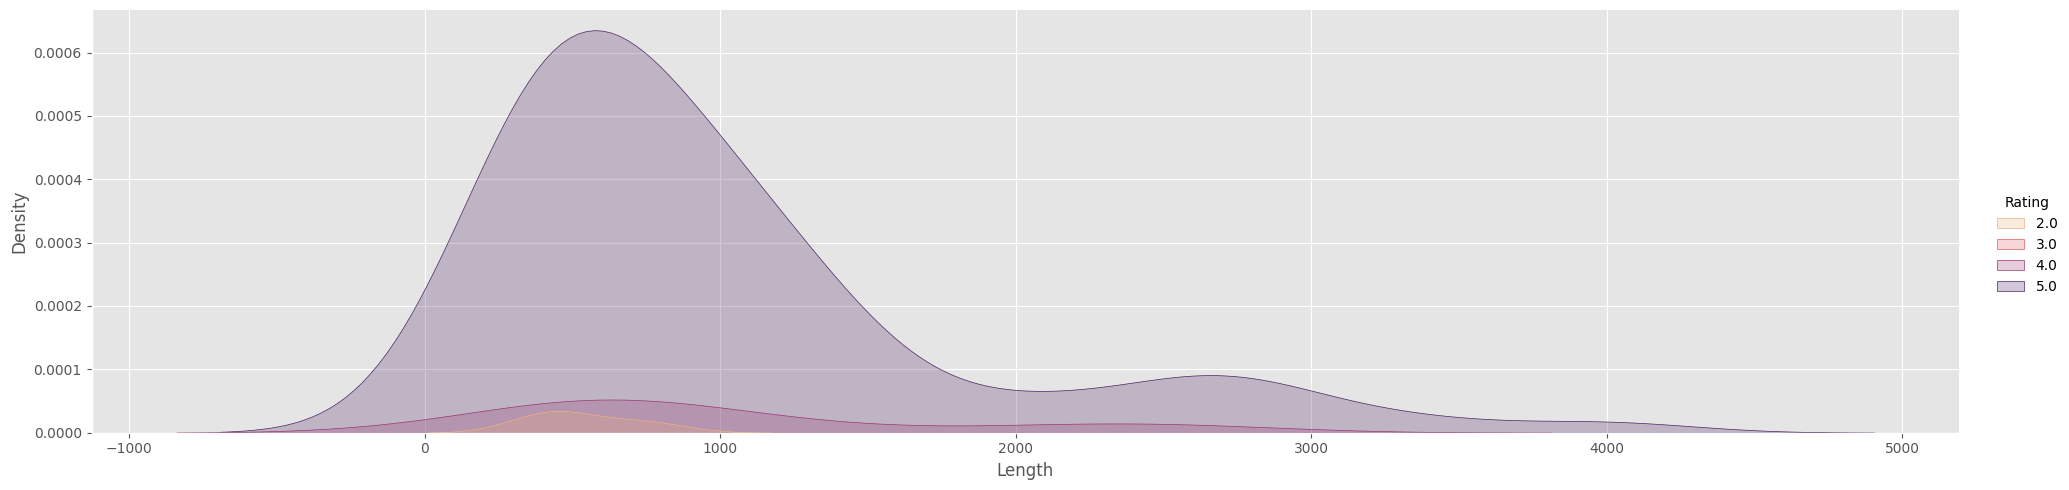

In [45]:
sns.displot(data=hotels_csv_file, x='Length', hue='Rating', palette='flare', kind='kde', fill=True, aspect=4)

In [49]:
rev100 = hotels_csv_file['Review'][100]
print(rev100)

It’s been one day since our five night Chongfah holiday ended. We are now in a big city hotel while visiting friends. Am I missing waking to the sound of waves breaking outside my seaside bungalow? Yes. Am I missing the wonderful amenities included with that bungalow? Yes. Am I missing the most amazing breakfast choices I may have ever been offered? Yes. Am I missing excellent sunset meals at that same restaurant? Yes. You can read the many reviews about all of these and all of them a part of my five-star rating. So what do I miss the most? I miss the staff and the guests. I miss Zel (more about her later) greeting me in the morning as I step out of the bungalow to enjoy the morning. I miss Yado’s smile and warm greeting as he seats me for the included breakfast. Each day I would enjoy a coffee latte while waiting for my to join me. I also miss a lovely family of five visiting from Brussels and dining with us twice. When grandparents are separated from grandchildren, they enjoy the com